In [1]:
import shap
import xgboost
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl


In [2]:
X,y = shap.datasets.nhanesi()
X_display,y_display = shap.datasets.nhanesi(display=True) # human readable feature values

xgb_full = xgboost.DMatrix(X, label=y)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)


In [3]:
# use validation set to choose # of trees
params = {
    "eta": 0.002,
    "max_depth": 3,
    "objective": "survival:cox",
    "subsample": 0.5
}
model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)


[0]	test-cox-nloglik:7.26934
[1000]	test-cox-nloglik:6.55588
[2000]	test-cox-nloglik:6.48688
[3000]	test-cox-nloglik:6.47231
[4000]	test-cox-nloglik:6.46993
[5000]	test-cox-nloglik:6.47147
[6000]	test-cox-nloglik:6.47407
[7000]	test-cox-nloglik:6.47613
[8000]	test-cox-nloglik:6.47911
[9000]	test-cox-nloglik:6.48227
[9999]	test-cox-nloglik:6.48552


In [4]:
# train final model on the full data set
params = {
    "eta": 0.002,
    "max_depth": 3, 
    "objective": "survival:cox",
    "subsample": 0.5
}
model = xgboost.train(params, xgb_full, 5000, evals = [(xgb_full, "test")], verbose_eval=1000)

[0]	test-cox-nloglik:8.88081
[1000]	test-cox-nloglik:8.1673
[2000]	test-cox-nloglik:8.07806
[3000]	test-cox-nloglik:8.03906
[4000]	test-cox-nloglik:8.01412
[4999]	test-cox-nloglik:7.99296


In [5]:
def c_statistic_harrell(pred, labels):
    total = 0
    matches = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if labels[j] > 0 and abs(labels[i]) > labels[j]:
                total += 1
                if pred[j] > pred[i]:
                    matches += 1
    return matches/total

# see how well we can order people by survival
c_statistic_harrell(model_train.predict(xgb_test, ntree_limit=5000), y_test)

0.8356854248404286

In [6]:
shap_values = shap.TreeExplainer(model).shap_values(X)


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.


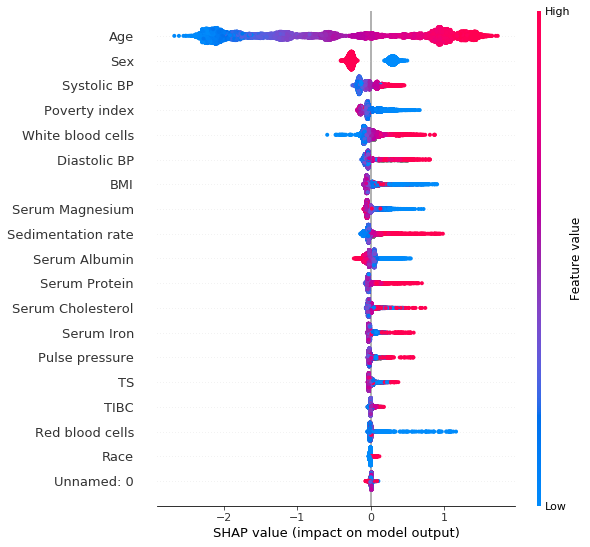

In [7]:
shap.summary_plot(shap_values, X)


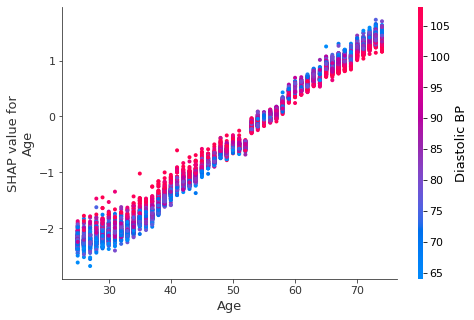

In [8]:
shap.dependence_plot("Age", shap_values, X)


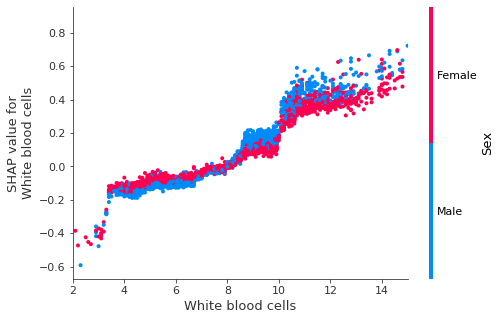

In [9]:
shap.dependence_plot("White blood cells", shap_values, X, display_features=X_display, show=False)
pl.xlim(2,15)
pl.show()


In [11]:
!pip install shap

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [17]:
!pip install shap
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier(nestimators=100, max_depth=2).fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X[:1000])
shap.plots.heatmap(shap_values)

AttributeError: module 'shap' has no attribute 'Explainer'

In [14]:
!y

/bin/sh: 1: y: not found
